# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Load Data

In [2]:
df = pd.read_csv('fraud dataset.csv')

In [3]:
df

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,1,9,False,3,999,1.332.292.784,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,5,8,False,3,999,1.369.047.619,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,15523460.4,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,2,4,False,3,999,7.117.647.059,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,1,9,False,3,999,617.968.254,2500000.0,100000.0,1.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12880,9482,2457523,2457583,111,-2,1798,1809533,385,11,100000.0,...,1,9,False,3,999,2.917.987.388,7400000.0,26500.0,2.57,0
12881,6073,2457459,2457517,111,-2,1798,219609,26,10,2500000.0,...,1,9,False,3,999,1.914.436.709,20000000.0,100000.0,2.73,0
12882,12164,2457620,2457712,103,-2,1798,-3,156,12,1250000.0,...,5,8,False,3,999,3.417.045.455,1000000.0,100000.0,1.33,1
12883,5264,2457514,2457526,111,-2,1798,3067053,26,10,500000.0,...,1,9,False,3,999,7.644.507.647,3000000.0,25000.0,1.62,0


# Data Cleaning

## Checking Duplicates Data

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.shape

(12885, 28)

## Checking Data Types

In [6]:
df.dtypes

Id                              int64
id_tanggal_transaksi_awal       int64
tanggal_transaksi_awal          int64
tipe_kartu                      int64
id_merchant                     int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi               float64
id_negara                       int64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
id_channel                      int64
flag_transaksi_finansial         bool
status_transaksi                int64
bank_pemilik_kartu              int64
rata_rata_nilai_transaksi      object
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_ju

handle abnormal float on data

In [7]:
df['rata_rata_nilai_transaksi'] = df['rata_rata_nilai_transaksi'].str.replace('\.(?=.*?\.)', '')
df['rata_rata_nilai_transaksi'] = df['rata_rata_nilai_transaksi'].astype('float64')

Checking boolean type data and single value

In [8]:
df['flag_transaksi_finansial'].value_counts()

False    12885
Name: flag_transaksi_finansial, dtype: int64

In [9]:
df['status_transaksi'].value_counts()

3    12885
Name: status_transaksi, dtype: int64

In [10]:
df['bank_pemilik_kartu'].value_counts()

999    12885
Name: bank_pemilik_kartu, dtype: int64

In [11]:
df.drop(columns = ['flag_transaksi_finansial','status_transaksi', 'bank_pemilik_kartu', 
                   'tanggal_transaksi_awal'], inplace = True)

In [12]:
df.dtypes

Id                              int64
id_tanggal_transaksi_awal       int64
tipe_kartu                      int64
id_merchant                     int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi               float64
id_negara                       int64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
id_channel                      int64
rata_rata_nilai_transaksi     float64
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_jumlah_transaksi    float64
flag_transaksi_fraud            int64
dtype: object

## Checking Missing Values

In [13]:
df.isna().sum()

Id                             0
id_tanggal_transaksi_awal      0
tipe_kartu                     0
id_merchant                    0
nama_merchant                  0
tipe_mesin                     0
tipe_transaksi                 0
nama_transaksi                 0
nilai_transaksi                0
id_negara                      0
nama_negara                    0
nama_kota                      0
lokasi_mesin                   0
pemilik_mesin                  0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
nama_channel                   0
id_channel                     0
rata_rata_nilai_transaksi     20
maksimum_nilai_transaksi      20
minimum_nilai_transaksi       20
rata_rata_jumlah_transaksi    20
flag_transaksi_fraud           0
dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

Id                            0
id_tanggal_transaksi_awal     0
tipe_kartu                    0
id_merchant                   0
nama_merchant                 0
tipe_mesin                    0
tipe_transaksi                0
nama_transaksi                0
nilai_transaksi               0
id_negara                     0
nama_negara                   0
nama_kota                     0
lokasi_mesin                  0
pemilik_mesin                 0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
nama_channel                  0
id_channel                    0
rata_rata_nilai_transaksi     0
maksimum_nilai_transaksi      0
minimum_nilai_transaksi       0
rata_rata_jumlah_transaksi    0
flag_transaksi_fraud          0
dtype: int64

# EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12865 entries, 0 to 12884
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          12865 non-null  int64  
 1   id_tanggal_transaksi_awal   12865 non-null  int64  
 2   tipe_kartu                  12865 non-null  int64  
 3   id_merchant                 12865 non-null  int64  
 4   nama_merchant               12865 non-null  int64  
 5   tipe_mesin                  12865 non-null  int64  
 6   tipe_transaksi              12865 non-null  int64  
 7   nama_transaksi              12865 non-null  int64  
 8   nilai_transaksi             12865 non-null  float64
 9   id_negara                   12865 non-null  int64  
 10  nama_negara                 12865 non-null  int64  
 11  nama_kota                   12865 non-null  int64  
 12  lokasi_mesin                12865 non-null  int64  
 13  pemilik_mesin               128

In [17]:
df.shape

(12865, 24)

In [18]:
df.describe()

,Id,id_tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,...,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,12865.000000,1.286500e+04,12865.000000,12865.000000,12865.000000,1.286500e+04,12865.000000,12865.000000,1.286500e+04,12865.000000,...,12865.000000,12865.000000,12865.000000,12865.000000,12865.000000,1.286500e+04,1.286500e+04,1.286500e+04,12865.000000,12865.000000
mean,7503.979479,2.457490e+06,85.347765,39207.496386,1679.295531,1.648267e+06,178.705791,10.734784,1.316106e+06,96.059153,...,138879.334085,2.854800,1.932530,1.402487,8.241508,3.448949e+06,1.227942e+07,7.687497e+04,2.439307,0.067703
std,4325.550264,1.048149e+02,40.921405,124155.261975,360.139367,9.907212e+05,142.560290,3.889618,2.849439e+06,3.602769,...,47866.468657,0.825716,0.250844,1.011821,1.717960,2.740410e+06,1.643170e+07,6.827365e+05,1.395700,0.251245
min,1.000000,2.457297e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,-2.000000,...,47.000000,1.000000,1.000000,1.000000,3.000000,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3775.000000,2.457404e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,96.000000,...,102622.000000,2.000000,2.000000,1.000000,9.000000,1.358069e+06,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7471.000000,2.457501e+06,103.000000,-2.000000,1798.000000,1.834410e+06,156.000000,10.000000,5.680000e+05,96.000000,...,140621.000000,3.000000,2.000000,1.000000,9.000000,2.323058e+06,6.000000e+06,3.700000e+04,2.100000,0.000000
75%,11263.000000,2.457581e+06,111.000000,-2.000000,1798.000000,2.417114e+06,301.000000,11.000000,1.256095e+06,96.000000,...,175436.000000,3.000000,2.000000,1.000000,9.000000,5.062755e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,216.000000,...,235914.000000,4.000000,2.000000,5.000000,9.000000,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='rata_rata_jumlah_transaksi', ylabel='Density'>

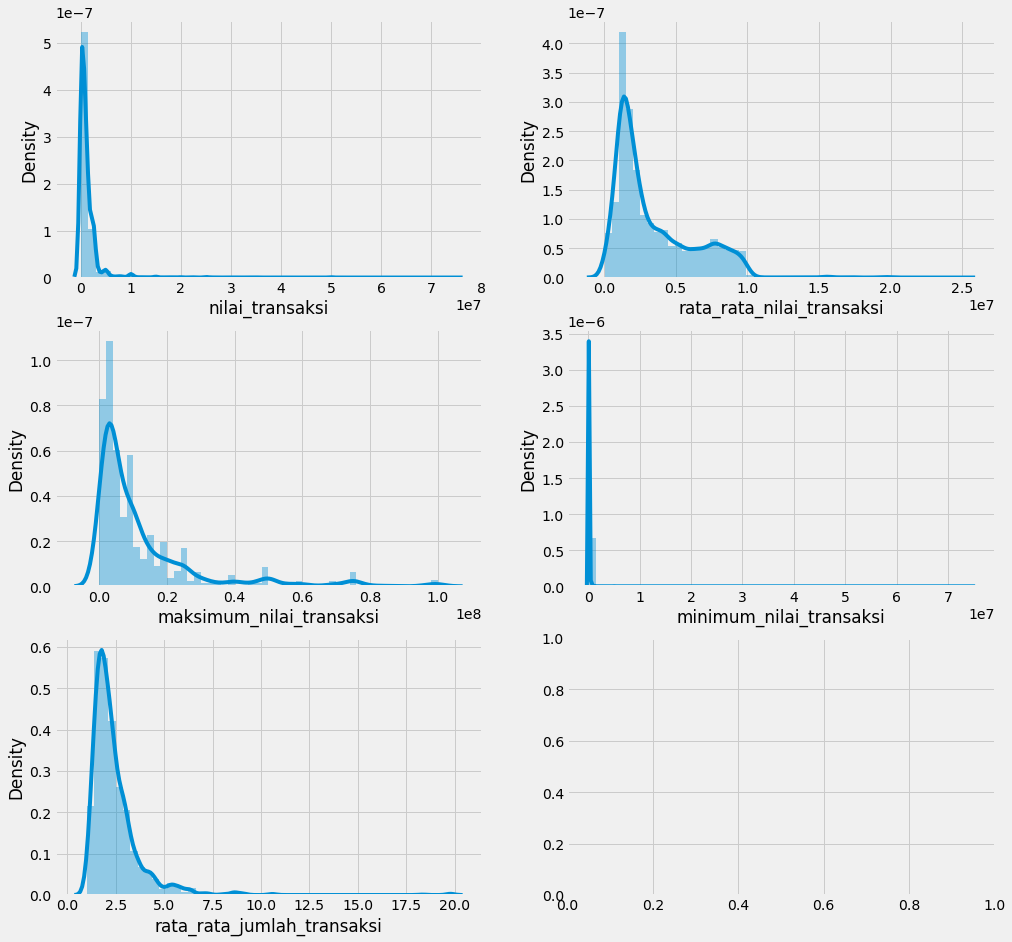

In [19]:
fig, axs = plt.subplots(3,2,figsize = (15,15))
sns.distplot(df['nilai_transaksi'], ax = axs[0,0])
sns.distplot(df['rata_rata_nilai_transaksi'], ax = axs[0,1])
sns.distplot(df['maksimum_nilai_transaksi'], ax = axs[1,0])
sns.distplot(df['minimum_nilai_transaksi'], ax = axs[1,1])
sns.distplot(df['rata_rata_jumlah_transaksi'], ax = axs[2,0])

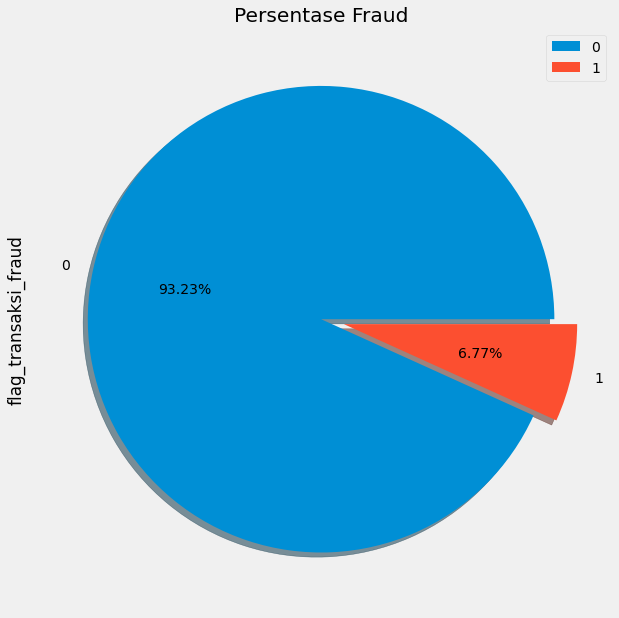

In [20]:
plt.figure(figsize=(10,10))
df['flag_transaksi_fraud'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Persentase Fraud")
plt.legend()
plt.show()

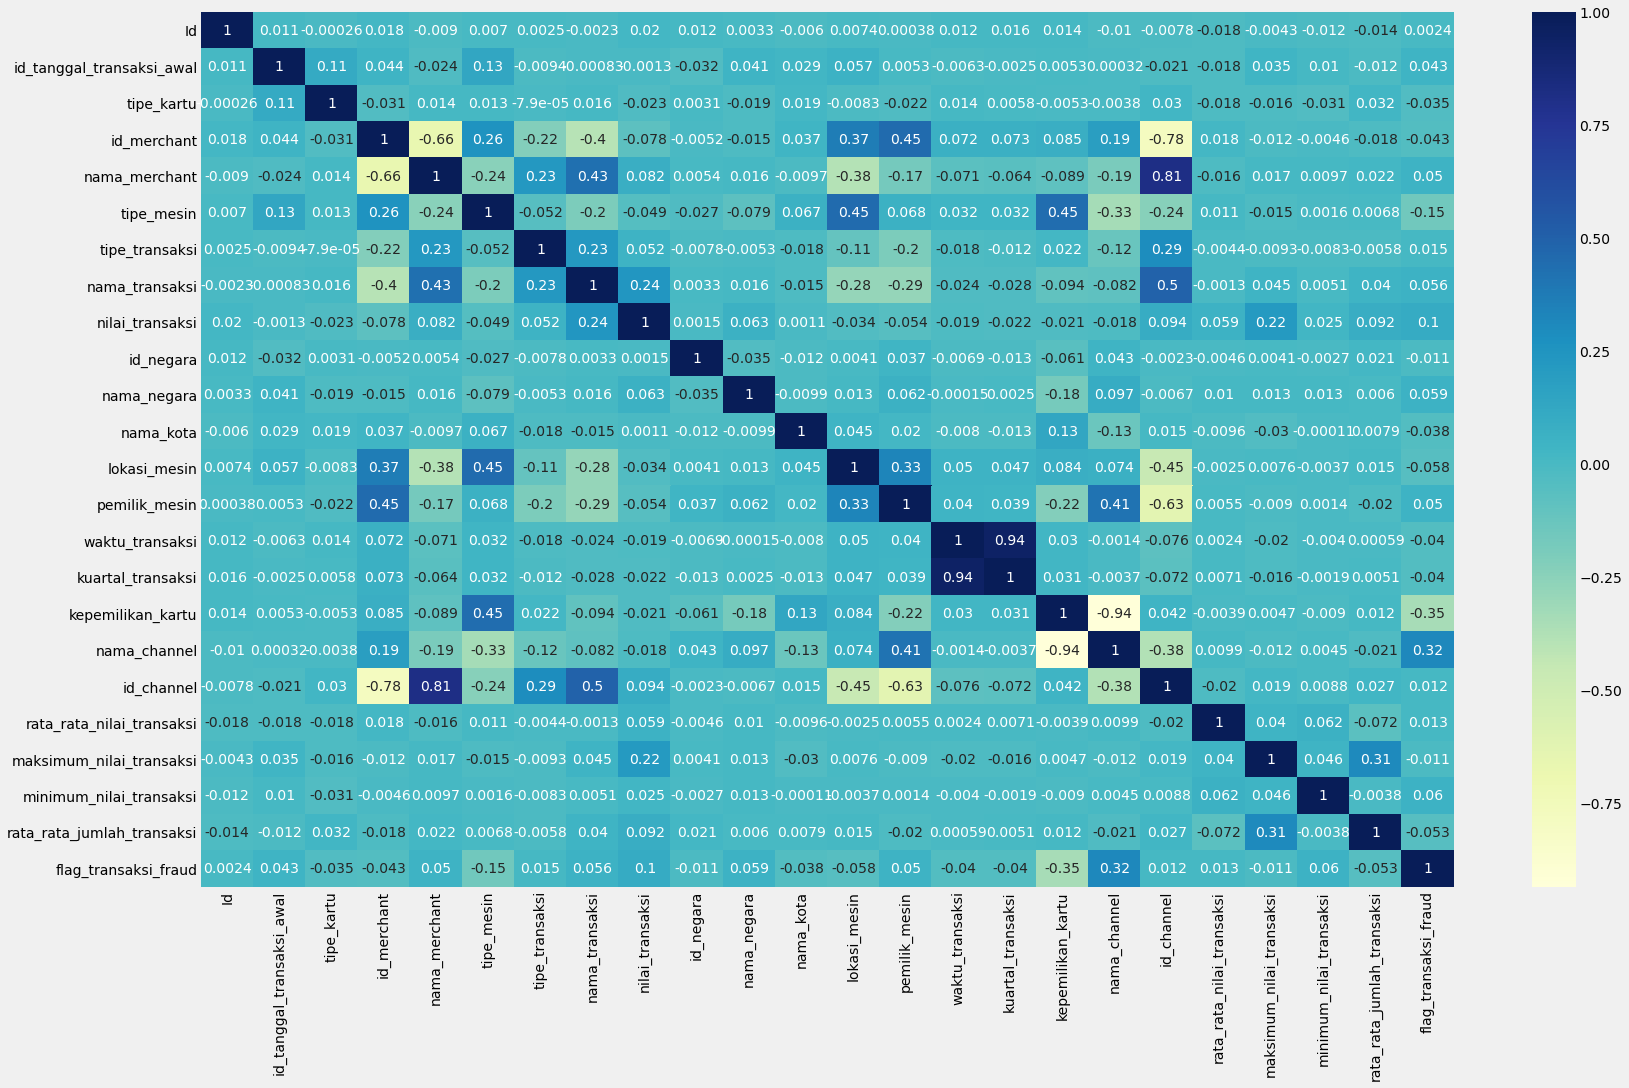

In [21]:
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), 
            annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

## Outlier Detection

In [22]:
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

<AxesSubplot:xlabel='rata_rata_jumlah_transaksi'>

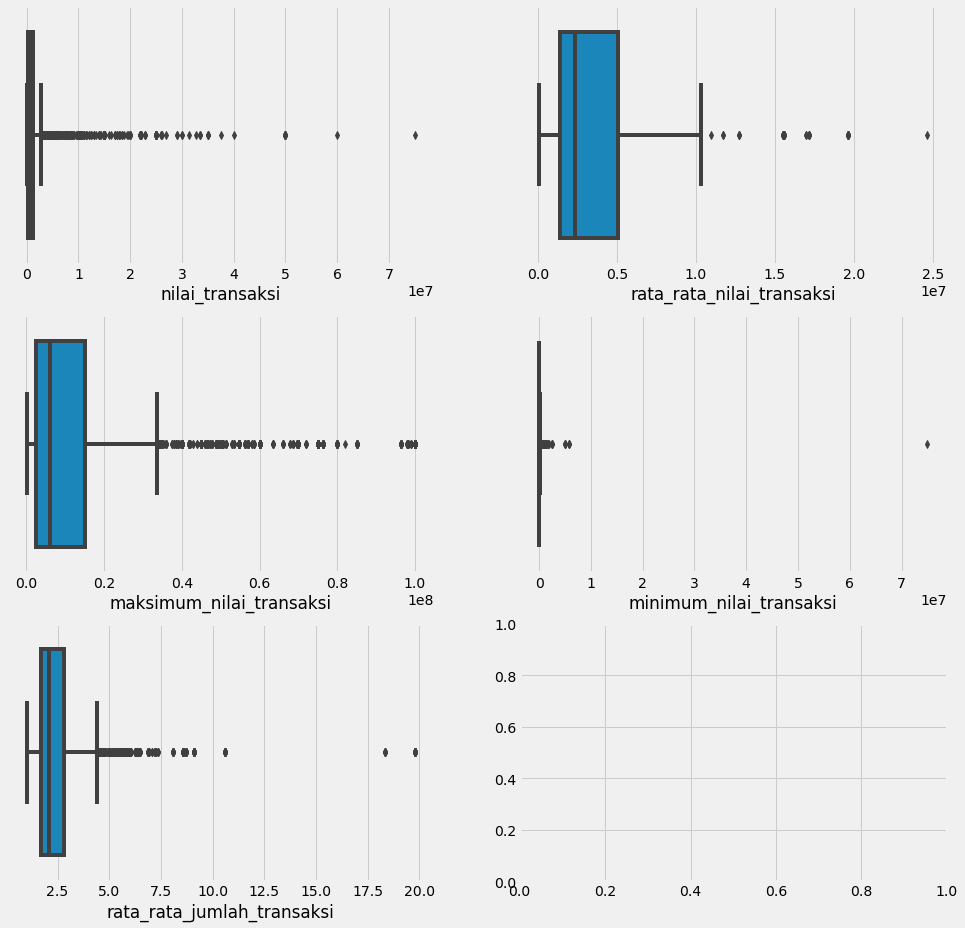

In [23]:
fig, axs = plt.subplots(3,2,figsize = (15,15))
sns.boxplot(df['nilai_transaksi'], ax = axs[0,0])
sns.boxplot(df['rata_rata_nilai_transaksi'], ax = axs[0,1])
sns.boxplot(df['maksimum_nilai_transaksi'], ax = axs[1,0])
sns.boxplot(df['minimum_nilai_transaksi'], ax = axs[1,1])
sns.boxplot(df['rata_rata_jumlah_transaksi'], ax = axs[2,0])

In [24]:
Q1=df['nilai_transaksi'].quantile(0.25)
Q3=df['nilai_transaksi'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df['nilai_transaksi']>upper_range),:]

df.loc[(df['nilai_transaksi']>upper_range),'nilai_transaksi']=upper_range
df.loc[(df['nilai_transaksi']<lower_range),'nilai_transaksi']=lower_range

In [25]:
Q1=df['rata_rata_nilai_transaksi'].quantile(0.25)
Q3=df['rata_rata_nilai_transaksi'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df['rata_rata_nilai_transaksi']>upper_range),:]

#Replace outlier observations with upper bound and lower bound
df.loc[(df['rata_rata_nilai_transaksi']>upper_range),'rata_rata_nilai_transaksi']=upper_range
df.loc[(df['rata_rata_nilai_transaksi']<lower_range),'rata_rata_nilai_transaksi']=lower_range

In [26]:
Q1=df['maksimum_nilai_transaksi'].quantile(0.25)
Q3=df['maksimum_nilai_transaksi'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df['maksimum_nilai_transaksi']>upper_range),:]

df.loc[(df['maksimum_nilai_transaksi']>upper_range),'maksimum_nilai_transaksi']=upper_range
df.loc[(df['maksimum_nilai_transaksi']<lower_range),'maksimum_nilai_transaksi']=lower_range

In [27]:
Q1=df['minimum_nilai_transaksi'].quantile(0.25)
Q3=df['minimum_nilai_transaksi'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df['minimum_nilai_transaksi']>upper_range),:]

df.loc[(df['minimum_nilai_transaksi']>upper_range),'minimum_nilai_transaksi']=upper_range
df.loc[(df['minimum_nilai_transaksi']<lower_range),'minimum_nilai_transaksi']=lower_range

In [28]:
Q1=df['rata_rata_jumlah_transaksi'].quantile(0.25)
Q3=df['rata_rata_jumlah_transaksi'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df['rata_rata_jumlah_transaksi']>upper_range),:]

df.loc[(df['rata_rata_jumlah_transaksi']>upper_range),'rata_rata_jumlah_transaksi']=upper_range
df.loc[(df['rata_rata_jumlah_transaksi']<lower_range),'rata_rata_jumlah_transaksi']=lower_range

In [29]:
Id_col = ['Id']
target_col = ['flag_transaksi_fraud']
num_cols   = ['nilai_transaksi', 'rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 
              'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']
cat_cols   = df.nunique()[df.nunique() <= 20].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col + num_cols]

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

# Data Partition

In [31]:
from sklearn.model_selection import train_test_split

df=df.drop(["Id"],axis=1)

#Memisah variabel prediktor dan target
x=df.drop(["flag_transaksi_fraud"],axis=1)
y=df["flag_transaksi_fraud"]

##partition data into data training and data testing
train_X, test_X, train_Y, test_Y= train_test_split(x,y,test_size = .20 ,random_state = 112)

# SMOTE

In [32]:
#target column value count
train_Y.value_counts()

0    9584
1     708
Name: flag_transaksi_fraud, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

#memisah nama kolom variabel prediktor dan target
y_cols=["flag_transaksi_fraud"]
x_cols= [x for x in df.columns if x not in y_cols]

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=x_cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=y_cols)


In [34]:
#Proportion after smote
train_smote_Y['flag_transaksi_fraud'].value_counts()

1    9584
0    9584
Name: flag_transaksi_fraud, dtype: int64

# Load data predict

In [35]:
dp = pd.read_csv('Data Predict.csv')
dp

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,...,2,1,9,False,3,999,2.877.203.488,2300000.0,21600.0,1.20
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,...,2,1,9,False,3,999,3.389.741.935,1400000.0,64524.0,1.52
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,...,2,1,9,False,3,999,797.473.227,1750000.0,250000.0,1.46
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,...,2,2,4,False,3,999,6.457.195.423,8000000.0,23000.0,2.90
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,...,1,5,8,False,3,999,2.116.285.714,12000000.0,200000.0,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,406,2457417,2457507,111,-2,1798,1154047,385,11,1250000,...,2,1,9,False,3,999,7.110.078.384,3250000.0,50000.0,1.76
236,13276,2457476,2457568,103,-2,1798,1818254,301,16,1000000,...,2,1,9,False,3,999,7.489.285.714,6200000.0,15.0,2.35
237,10926,2457378,2457397,0,90479,519,2573188,58,6,415000,...,2,2,4,False,3,999,1.675.588.606,5000000.0,103700.0,1.53
238,5965,2457641,2457664,103,-2,1798,219608,26,10,150000,...,2,1,9,False,3,999,6.604.166.667,5440000.0,50000.0,1.46


In [36]:
dp['rata_rata_nilai_transaksi'] = dp['rata_rata_nilai_transaksi'].str.replace('\.(?=.*?\.)', '')
dp['rata_rata_nilai_transaksi'] = dp['rata_rata_nilai_transaksi'].astype('float64')

In [37]:
dp.isna().sum()

Id                            0
id_tanggal_transaksi_awal     0
tanggal_transaksi_awal        0
tipe_kartu                    0
id_merchant                   0
nama_merchant                 0
tipe_mesin                    0
tipe_transaksi                0
nama_transaksi                0
nilai_transaksi               0
id_negara                     0
nama_negara                   0
nama_kota                     0
lokasi_mesin                  0
pemilik_mesin                 0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
nama_channel                  0
id_channel                    0
flag_transaksi_finansial      0
status_transaksi              0
bank_pemilik_kartu            0
rata_rata_nilai_transaksi     1
maksimum_nilai_transaksi      1
minimum_nilai_transaksi       1
rata_rata_jumlah_transaksi    1
dtype: int64

In [38]:
for col in dp:
    if dp[col].isnull().any():
        dp[col] = dp[col].fillna(dp[col].median())

In [39]:
dp.drop(columns = ['status_transaksi', 'bank_pemilik_kartu', 'flag_transaksi_finansial', 
                   'tanggal_transaksi_awal'], inplace = True)

In [40]:
Id_col_dp = ['Id']
num_cols_dp   = ['nilai_transaksi', 'rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 
              'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']
cat_cols_dp   = dp.nunique()[dp.nunique() <= 20].keys().tolist()

In [41]:
dp[num_cols_dp] = ss.fit_transform(dp[num_cols_dp])

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0, solver = 'liblinear',
                                penalty = 'l1')
lg.fit(train_smote_X, train_smote_Y)

pred_lg = lg.predict(test_X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred_lg))

Accuracy for Random Forest on CV data:  0.7994558880684026


<AxesSubplot:>

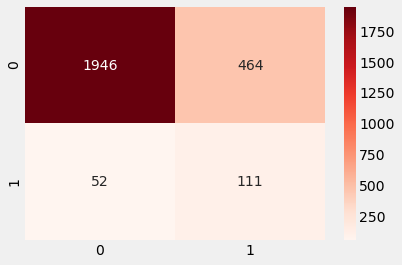

In [44]:
from sklearn.metrics import confusion_matrix
CF_lg=confusion_matrix(test_Y, pred_lg)
sns.heatmap(CF_lg, annot=True, cmap = 'Reds', fmt = 'g')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, pred_lg))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2410
           1       0.19      0.68      0.30       163

    accuracy                           0.80      2573
   macro avg       0.58      0.74      0.59      2573
weighted avg       0.92      0.80      0.85      2573



In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_lg)

0.7442252373800371

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [48]:
rfc = RandomForestClassifier(random_state=123)

In [49]:
param_grid = { 
    'n_estimators': [200,500,1000],
    'max_features': ['auto', 'log2'],
    'criterion' :['entropy','gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

In [50]:
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [51]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}

In [52]:
CV_rfc.best_score_

0.9598828695610356

## Evaluation

In [53]:
pred_rfc=CV_rfc.predict(test_X)

In [54]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred_rfc))

Accuracy for Random Forest on CV data:  0.9366498251068791


<AxesSubplot:>

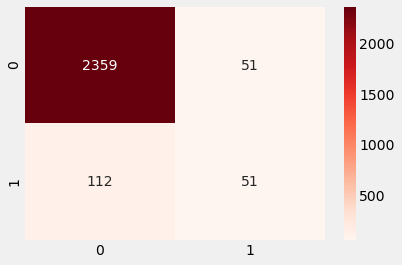

In [55]:
CF_rfc=confusion_matrix(test_Y, pred_rfc)
sns.heatmap(CF_rfc, annot=True, cmap = 'Reds', fmt = 'g')

In [56]:
target_names = ['No','Yes']
print(classification_report(test_Y,pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.98      0.97      2410
         Yes       0.50      0.31      0.38       163

    accuracy                           0.94      2573
   macro avg       0.73      0.65      0.68      2573
weighted avg       0.93      0.94      0.93      2573



In [57]:
roc_auc_score(test_Y,pred_rfc)

0.6458608049283404

# DT

In [58]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()
param_grid = {"criterion":["gini","entropy"],
              'min_samples_split': [2,5,10,50,100],
             "max_depth":[3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [59]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 2)
CV_dtc.fit(train_smote_X, train_smote_Y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'min_samples_split': [2, 5, 10, 50, 100]})

In [60]:
CV_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}

## Evaluation

In [61]:
pred_dtc=CV_dtc.predict(test_X)

In [62]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_Y,pred_dtc))

Accuracy for Decision Tree on CV data:  0.883793237465993


<AxesSubplot:>

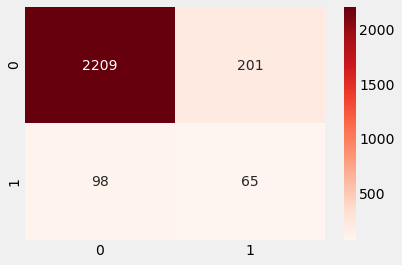

In [63]:
CF_dtc=confusion_matrix(test_Y, pred_dtc)
sns.heatmap(CF_dtc, annot=True, cmap = 'Reds', fmt = 'g')

In [64]:
target_names = ['No','Yes']
print(classification_report(test_Y, pred_dtc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.92      0.94      2410
         Yes       0.24      0.40      0.30       163

    accuracy                           0.88      2573
   macro avg       0.60      0.66      0.62      2573
weighted avg       0.91      0.88      0.90      2573



In [65]:
roc_auc_score(test_Y,pred_dtc)

0.6576852582542065

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [2,3,4,5,6],
    'metric': ['euclidean','manhatan']
}

In [67]:
from sklearn.model_selection import GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 2)
CV_knnc.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\user\anaconda3\lib\site-packages\s

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatan'],
                         'n_neighbors': [2, 3, 4, 5, 6]})

In [68]:
CV_knnc.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## Evaluation

In [69]:
pred_knnc=CV_knnc.predict(test_X)

In [70]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,pred_knnc))

Accuracy for KNN on CV data:  0.7722502914885347


<AxesSubplot:>

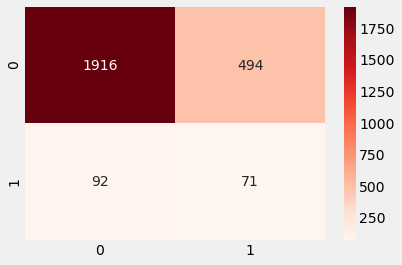

In [71]:
CF_knnc=confusion_matrix(test_Y, pred_knnc)
sns.heatmap(CF_knnc, annot=True, cmap = 'Reds', fmt = 'g')

In [72]:
target_names = ['No','Yes']
print(classification_report(test_Y, pred_knnc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.80      0.87      2410
         Yes       0.13      0.44      0.20       163

    accuracy                           0.77      2573
   macro avg       0.54      0.62      0.53      2573
weighted avg       0.90      0.77      0.82      2573



In [73]:
roc_auc_score(test_Y,pred_knnc)

0.6153017844869282

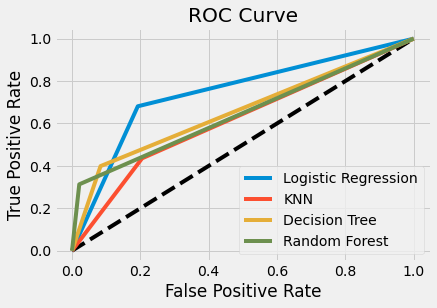

In [75]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lg, tpr_lg, thresholds_lg = roc_curve(test_Y, pred_lg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_Y, pred_knnc)

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(test_Y, pred_dtc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_Y, pred_rfc)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lg, tpr_lg, label = 'Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label = 'KNN')

plt.plot(fpr_dtc, tpr_dtc, label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Model Deployment

In [76]:
pred_new_lg = lg.predict(dp.drop(columns=['Id'],axis=1))

In [77]:
dp["flag_transaksi_fraud"]=pred_new_lg
submission=dp.loc[:,["Id","flag_transaksi_fraud"]]
submission.to_csv("submission_.csv", index=False)

In [78]:
dp["flag_transaksi_fraud"].value_counts()

0    198
1     42
Name: flag_transaksi_fraud, dtype: int64